Mean Squared Error: 17173972358.522707


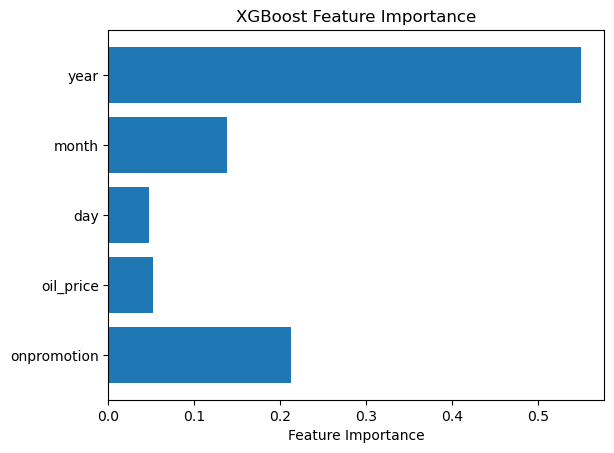

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("store_sales_cleaned_combined.csv")

# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])

# Feature engineering if needed
# For example, you might want to extract day, month, and year from the date
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# Drop the original date column and any other unnecessary columns
df = df.drop(["date"], axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop("sales", axis=1)
y = df["sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot feature importance
feature_importance = model.feature_importances_
features = X.columns
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example of data preprocessing pipeline
numeric_features = ['onpromotion', 'oil_price', 'day', 'month', 'year']
categorical_features = []

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Include the preprocessor in the XGBoost pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', XGBRegressor())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 17173972358.522707


In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform RandomizedSearchCV
grid_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'regressor__subsample': 0.9, 'regressor__n_estimators': 300, 'regressor__min_child_weight': 1, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.01, 'regressor__colsample_bytree': 0.9}
Mean Squared Error: 17090646872.818304


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt

# Load the training data
train_data = pd.read_csv('store_sales_cleaned_combined.csv', parse_dates=['date'])

# Feature engineering (you may need to customize this based on your specific requirements)
train_data['day'] = train_data['date'].dt.day
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year

# Define features and target variable
features = ['onpromotion', 'oil_price', 'day', 'month', 'year']
target = 'sales'

# Split the data into training and validation sets
train_set, val_set = train_test_split(train_data, test_size=0.2, shuffle=False)

# Create XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
model.fit(train_set[features], train_set[target])

# Make predictions on the validation set
val_predictions = model.predict(val_set[features])

# Evaluate the model
rmse = sqrt(mean_squared_error(val_set[target], val_predictions))
print(f'Root Mean Squared Error (RMSE) on the validation set: {rmse}')

# Now, you can use the trained model to make predictions on the test data
# Load the test data
test_data = pd.read_csv('reform_test.csv', parse_dates=['date'])

# Feature engineering for the test data (make sure it's consistent with the training data)
test_data['day'] = test_data['date'].dt.day
test_data['month'] = test_data['date'].dt.month
test_data['year'] = test_data['date'].dt.year

# Make predictions on the test set
test_predictions = model.predict(test_data[features])

# Print or use test_predictions as needed
print("Test Predictions:", test_predictions)



Root Mean Squared Error (RMSE) on the validation set: 248979.41461202793


FileNotFoundError: [Errno 2] No such file or directory: 'reform_test.csv'